In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlpremier.cnn.preprocess import generate_cnn_data, split_preprocess_cnn_data
from mlpremier.cnn.model import build_train_cnn
from mlpremier.cnn.evaluate import gridsearch_analysis
import tensorflow as tf
import random


## PieceWise Testing

## Generate the CNN Data

======= Generating CNN Data for Season: 2020-21, Position: FWD =======
Dropping Players with Avg. Playtime < 25...

Total players of type FWD = 92.
52 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (1334, 7).
Generated combined features dataframe for preprocessing of shape: (1414, 15).

========== EDA ==========
Selected Statistics:
        minutes  goals_scored   assists  goals_conceded  clean_sheets  \
mean  53.398868      0.207921  0.121641        0.821075      0.174682   
min    0.000000      0.000000  0.000000        0.000000      0.000000   
max   90.000000      3.000000  4.000000        9.000000      1.000000   
std   37.924134      0.488271  0.386501        1.154618      0.379829   

            bps  yellow_cards  red_cards  own_goals  saves  penalties_missed  \
mean   9.273692      0.055870   0.003536        0.0    0.0          0.004243   
min  -14.000000      0.000000   0.000000        0.0    0.0          0.000000   
max   93.00000

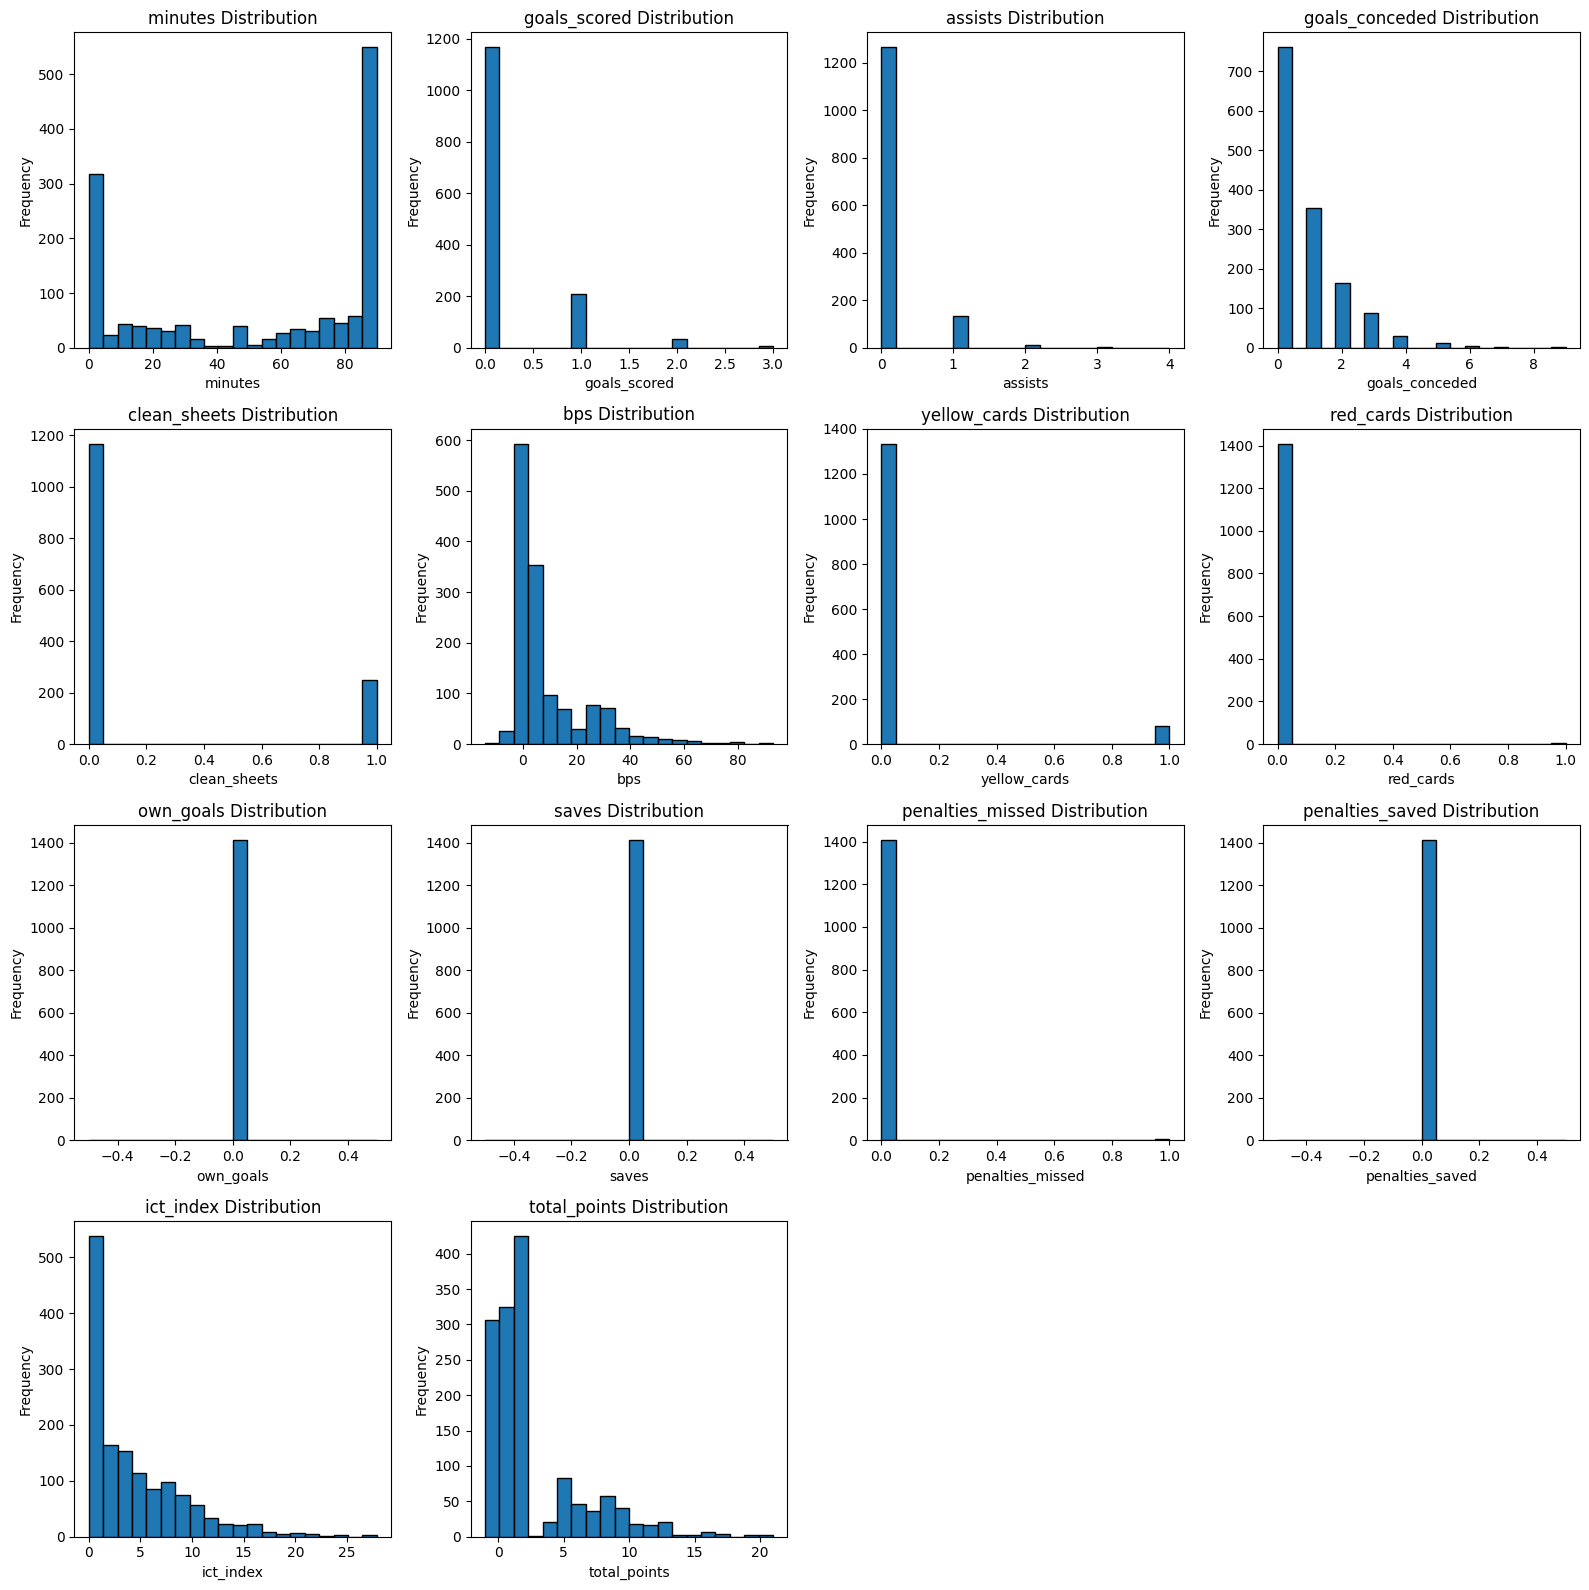

========== Done Generating CNN Data ==========



,minutes,goals_scored,assists,goals_conceded,clean_sheets,bps,yellow_cards,red_cards,own_goals,saves,penalties_missed,penalties_saved,ict_index,total_points,name
0,27,0,0,0,0,3,0,0,0,0,0,0,1.0,1,Aleksandar Mitrović
1,90,2,0,4,0,47,1,0,0,0,0,0,15.9,12,Aleksandar Mitrović


In [14]:
df, features_df = generate_cnn_data(data_dir=os.path.join(os.getcwd(), '..', 'data', 'clean_data'), 
                         season='2020-21', 
                         position='FWD', 
                         window_size=2,
                         verbose = True)
df.loc[0,'features']


In [17]:
display(df['features'][0].loc[:, ['goals_scored', 'assists', 'total_points', 'name']])
display(df['target'][0])
display(df['matchup_difficulty'][0])

,goals_scored,assists,total_points,name
0,0,0,1,Aleksandar Mitrović
1,2,0,12,Aleksandar Mitrović


2

-1.0

In [25]:
df.loc[0:50]

,name,avg_score,season,features,target,matchup_difficulty
0,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conce...,4,-3.0
1,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conce...,2,-2.0
2,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conce...,2,-2.0
3,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conce...,3,0.0
4,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conce...,1,-2.0
5,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conc...,2,0.0
6,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conc...,2,-2.0
7,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conc...,2,-1.0
8,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conc...,2,-1.0
9,Aaron Ramsdale,3.236842,2020-21,minutes goals_scored assists goals_conc...,2,0.0


In [26]:
df.tail(5)

,name,avg_score,season,features,target,matchup_difficulty
723,Kasper Schmeichel,3.368421,2020-21,minutes goals_scored assists goals_conc...,2,2.0
724,Kasper Schmeichel,3.368421,2020-21,minutes goals_scored assists goals_conc...,0,2.0
725,Kasper Schmeichel,3.368421,2020-21,minutes goals_scored assists goals_conc...,2,0.0
726,Kasper Schmeichel,3.368421,2020-21,minutes goals_scored assists goals_conc...,2,0.0
727,Kasper Schmeichel,3.368421,2020-21,minutes goals_scored assists goals_conc...,-2,0.0


In [27]:
df.loc[0,'features'].shape

(6, 15)

In [28]:
df.loc[0,'features']

,minutes,goals_scored,assists,goals_conceded,clean_sheets,bps,yellow_cards,red_cards,own_goals,saves,penalties_missed,penalties_saved,ict_index,total_points,name
0,90,0,0,2,0,12,0,0,0,2,0,0,1.8,1,Aaron Ramsdale
1,90,0,0,1,0,10,0,0,0,1,0,0,1.1,2,Aaron Ramsdale
2,90,0,0,1,0,26,0,0,0,7,0,0,5.2,4,Aaron Ramsdale
3,90,0,0,2,0,13,0,0,0,3,0,0,2.1,2,Aaron Ramsdale
4,90,0,0,1,0,18,0,0,0,5,0,0,2.8,3,Aaron Ramsdale
5,90,0,0,2,0,14,0,0,0,3,0,0,2.2,2,Aaron Ramsdale


In [29]:
features_df

,minutes,goals_scored,assists,goals_conceded,clean_sheets,bps,yellow_cards,red_cards,own_goals,saves,penalties_missed,penalties_saved,ict_index,total_points,name
0,90,0,0,2,0,12,0,0,0,2,0,0,1.8,1,Aaron Ramsdale
1,90,0,0,1,0,10,0,0,0,1,0,0,1.1,2,Aaron Ramsdale
2,90,0,0,1,0,26,0,0,0,7,0,0,5.2,4,Aaron Ramsdale
3,90,0,0,2,0,13,0,0,0,3,0,0,2.1,2,Aaron Ramsdale
4,90,0,0,1,0,18,0,0,0,5,0,0,2.8,3,Aaron Ramsdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,90,0,0,1,0,11,0,0,0,2,0,0,1.4,2,Kasper Schmeichel
34,90,0,0,4,0,12,0,0,0,2,0,0,1.4,0,Kasper Schmeichel
35,90,0,0,1,0,7,0,0,0,0,0,0,0.3,2,Kasper Schmeichel
36,90,0,0,2,0,17,0,0,0,4,0,0,3.7,2,Kasper Schmeichel


In [30]:
features_df.describe()

,minutes,goals_scored,assists,goals_conceded,clean_sheets,bps,yellow_cards,red_cards,own_goals,saves,penalties_missed,penalties_saved,ict_index,total_points
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.0,866.000000,866.000000,866.000000
mean,74.073903,0.001155,0.002309,1.092379,0.247113,15.396074,0.033487,0.001155,0.003464,2.461894,0.0,0.012702,1.921940,3.137413
std,34.207582,0.033981,0.048029,1.263361,0.431582,9.859308,0.180009,0.033981,0.058789,2.092995,0.0,0.112050,1.530191,3.046584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-2.000000
25%,90.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.700000,1.000000
50%,90.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.800000,2.000000
75%,90.000000,0.000000,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,0.000000,4.000000,0.0,0.000000,2.900000,6.000000
max,90.000000,1.000000,1.000000,9.000000,1.000000,45.000000,1.000000,1.000000,1.000000,11.000000,0.0,1.000000,7.600000,15.000000


## Split & Preprocess CNN Data

========== Splitting CNN Data ==========

Shape of windowed_df: (728, 6)
Shape of a given window (prior to preprocessing): (6, 15)
Skill Distribution of Players:



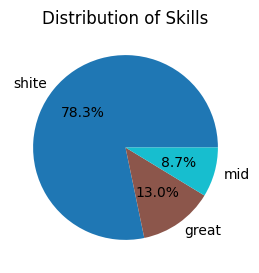

========== Preprocessing CNN Data ==========

No StandardScaler applied. standardize=False.
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

X_train shape: (410, 6, 14)
y_train shape: (410,)
X_val shape: (190, 6, 14)
y_val shape: (190,)
X_test shape: (128, 6, 14)
y_test shape: (128,)


In [32]:
(X_train, d_train, y_train, 
 X_val, d_val, y_val, 
 X_test, d_test, y_test) = split_preprocess_cnn_data(df, 
                                                            features_df,
                                                            standardize=False, 
                                                            verbose=True)

# Print shapes
#print("Expecting Shapes to be of (ex, window, ftr) where \n \tftr: ORGNL_FEATURE_SIZE + 19 (team dummies) + 19 (opponent_team dummies) = 58")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [33]:
X_train[0:2]

array([[[90. ,  0. ,  0. ,  2. ,  0. , 12. ,  0. ,  0. ,  0. ,  2. ,
          0. ,  0. ,  1.8,  1. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 10. ,  0. ,  0. ,  0. ,  1. ,
          0. ,  0. ,  1.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 26. ,  0. ,  0. ,  0. ,  7. ,
          0. ,  0. ,  5.2,  4. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 13. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 18. ,  0. ,  0. ,  0. ,  5. ,
          0. ,  0. ,  2.8,  3. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 14. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.2,  2. ]],

       [[90. ,  0. ,  0. ,  1. ,  0. , 10. ,  0. ,  0. ,  0. ,  1. ,
          0. ,  0. ,  1.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 26. ,  0. ,  0. ,  0. ,  7. ,
          0. ,  0. ,  5.2,  4. ],
        [90. ,  0. ,  0. ,  2. ,  0. , 13. ,  0. ,  0. ,  0. ,  3. ,
          0. ,  0. ,  2.1,  2. ],
        [90. ,  0. ,  0. ,  1. ,  0. , 18. ,  0. ,  0. ,  0. ,  5. ,
  

In [34]:
y_train[0:2]

array([4, 2])

In [35]:
d_train[0:2]

array([-3., -2.])

In [ ]:
tst = pd.DataFrame({'a': [1, 1, 3],
                   'b': [4.0, 5.5, 6.0],
                   'c': [7, 8, 9],
                   'name': ['hello', 'hello', 'foo']})
tst.head()


,a,b,c,name
0,1,4.0,7,hello
1,1,5.5,8,hello
2,3,6.0,9,foo


In [ ]:
tst2 = tst.groupby(['a', 'name'])[['a','c']].first()
tst2

,,a,c
a,name,,
1,hello,1,7
3,foo,3,9


In [ ]:
list(tst2['a'])

[1, 3]

In [ ]:
res = list(tst2.itertuples(index=False, name=None))
res

[(1, 7), (3, 9)]

(1, 7)

In [ ]:
tst = [1,4,5,6,7,2,12039,100]
strats = [0,0,0,0,0,0,5,5]
train_i, test_i = train_test_split(tst, test_size =0.4, stratify=strats)
print(train_i)
print(test_i)

[5, 12039, 6, 4]
[7, 2, 1, 100]
